In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
df_BTC = pd.read_csv('final_BTCUSDT.csv')

In [4]:
df_BTC.head()

,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,open_timestamp,close_timestamp,symbol,currency
0,"12/31/2021, 23:00:00","12/31/2021, 23:59:59",46303.98,46520.13,46132.04,46216.93,985.99762,4.571976e+07,29555,484.09229,2.244919e+07,0,1640991600000,1640995199999,BTC,USDT
1,"12/31/2021, 22:00:00","12/31/2021, 22:59:59",46333.87,46569.97,46232.36,46303.99,991.85142,4.600406e+07,36280,447.96605,2.077702e+07,0,1640988000000,1640991599999,BTC,USDT
2,"12/31/2021, 21:00:00","12/31/2021, 21:59:59",45886.66,46513.67,45766.85,46333.86,1734.69585,7.997065e+07,54579,972.44065,4.482430e+07,0,1640984400000,1640987999999,BTC,USDT
3,"12/31/2021, 20:00:00","12/31/2021, 20:59:59",45728.28,46211.07,45678.00,45879.24,1831.41202,8.422142e+07,51300,997.72369,4.588270e+07,0,1640980800000,1640984399999,BTC,USDT
4,"12/31/2021, 19:00:00","12/31/2021, 19:59:59",46686.42,46688.68,45678.96,45728.28,3851.30902,1.776171e+08,87472,1691.64542,7.803749e+07,0,1640977200000,1640980799999,BTC,USDT


In [5]:
df_BTC['open_time']

0        12/31/2021, 23:00:00
1        12/31/2021, 22:00:00
2        12/31/2021, 21:00:00
3        12/31/2021, 20:00:00
4        12/31/2021, 19:00:00
                 ...         
21269    01/01/2023, 04:00:00
21270    01/01/2023, 03:00:00
21271    01/01/2023, 02:00:00
21272    01/01/2023, 01:00:00
21273    01/01/2023, 00:00:00
Name: open_time, Length: 21274, dtype: object

In [6]:
df_BTC['datetime'] = df_BTC['open_time'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y, %H:%M:%S"))

In [7]:
df_BTC['year'] = df_BTC['datetime'].apply(lambda x: x.year)
df_BTC['month'] = df_BTC['datetime'].apply(lambda x: x.month)
df_BTC['day'] = df_BTC['datetime'].apply(lambda x: x.day)
df_BTC['day_of_week'] = df_BTC['datetime'].apply(lambda x: x.weekday())

In [8]:
df_BTC.head()

,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,...,ignore,open_timestamp,close_timestamp,symbol,currency,datetime,year,month,day,day_of_week
0,"12/31/2021, 23:00:00","12/31/2021, 23:59:59",46303.98,46520.13,46132.04,46216.93,985.99762,4.571976e+07,29555,484.09229,...,0,1640991600000,1640995199999,BTC,USDT,2021-12-31 23:00:00,2021,12,31,4
1,"12/31/2021, 22:00:00","12/31/2021, 22:59:59",46333.87,46569.97,46232.36,46303.99,991.85142,4.600406e+07,36280,447.96605,...,0,1640988000000,1640991599999,BTC,USDT,2021-12-31 22:00:00,2021,12,31,4
2,"12/31/2021, 21:00:00","12/31/2021, 21:59:59",45886.66,46513.67,45766.85,46333.86,1734.69585,7.997065e+07,54579,972.44065,...,0,1640984400000,1640987999999,BTC,USDT,2021-12-31 21:00:00,2021,12,31,4
3,"12/31/2021, 20:00:00","12/31/2021, 20:59:59",45728.28,46211.07,45678.00,45879.24,1831.41202,8.422142e+07,51300,997.72369,...,0,1640980800000,1640984399999,BTC,USDT,2021-12-31 20:00:00,2021,12,31,4
4,"12/31/2021, 19:00:00","12/31/2021, 19:59:59",46686.42,46688.68,45678.96,45728.28,3851.30902,1.776171e+08,87472,1691.64542,...,0,1640977200000,1640980799999,BTC,USDT,2021-12-31 19:00:00,2021,12,31,4


In [9]:
df_BTC.dtypes

open_time                               object
close_time                              object
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
quote_asset_volume                     float64
num_trades                               int64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
ignore                                   int64
open_timestamp                           int64
close_timestamp                          int64
symbol                                  object
currency                                object
datetime                        datetime64[ns]
year                                     int64
month                                    int64
day                                      int64
day_of_week                              int64
dtype: object

In [17]:
df_BTC = df_BTC.sort_values('datetime', ascending = True).reset_index()

In [19]:
df_BTC['change_close'] = - (df_BTC['close'].shift(1) - df_BTC['close'])

In [20]:
df_BTC.tail()

,index,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,...,open_timestamp,close_timestamp,symbol,currency,datetime,year,month,day,day_of_week,change_close
21269,17511,"06/06/2023, 19:00:00","06/06/2023, 19:59:59",26698.08,27216.89,26690.93,27080.13,6336.18815,1.708337e+08,104285,...,1686078000000,1686081599999,BTC,USDT,2023-06-06 19:00:00,2023,6,6,1,382.05
21270,17510,"06/06/2023, 20:00:00","06/06/2023, 20:59:59",27080.12,27222.00,26857.92,26944.98,5242.13695,1.416812e+08,94525,...,1686081600000,1686085199999,BTC,USDT,2023-06-06 20:00:00,2023,6,6,1,-135.15
21271,17509,"06/06/2023, 21:00:00","06/06/2023, 21:59:59",26944.99,27092.82,26938.06,27057.03,2014.79907,5.443146e+07,47340,...,1686085200000,1686088799999,BTC,USDT,2023-06-06 21:00:00,2023,6,6,1,112.05
21272,17508,"06/06/2023, 22:00:00","06/06/2023, 22:59:59",27057.03,27188.46,27044.34,27152.65,1842.84082,4.994595e+07,36436,...,1686088800000,1686092399999,BTC,USDT,2023-06-06 22:00:00,2023,6,6,1,95.62
21273,17507,"06/06/2023, 23:00:00","06/06/2023, 23:59:59",27152.66,27355.33,27120.02,27230.08,3752.27128,1.021350e+08,63295,...,1686092400000,1686095999999,BTC,USDT,2023-06-06 23:00:00,2023,6,6,1,77.43


In [21]:
df_BTC.shape

(21274, 23)

In [22]:
df_BTC = df_BTC.drop('ignore', axis =1)

In [14]:
df_BTC.tail()

,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,open_timestamp,close_timestamp,datetime,year,month,day,day_of_week,change_close
4,"05/24/2023, 19:00:00","05/24/2023, 19:59:59",26220.55,26397.64,26201.67,26252.33,2349.96235,61795762.11,40509,1171.28517,3.080221e+07,1.684950e+12,1.684960e+12,2023-05-24 19:00:00,2023,5,24,2,31.78
3,"05/24/2023, 20:00:00","05/24/2023, 20:59:59",26252.34,26486.46,26242.62,26404.18,2878.77545,75937036.88,47336,1539.53932,4.060586e+07,1.684960e+12,1.684960e+12,2023-05-24 20:00:00,2023,5,24,2,151.85
2,"05/24/2023, 21:00:00","05/24/2023, 21:59:59",26404.18,26464.65,26310.48,26368.66,1223.45586,32298325.57,27225,642.68037,1.696504e+07,1.684960e+12,1.684970e+12,2023-05-24 21:00:00,2023,5,24,2,-35.52
1,"05/24/2023, 22:00:00","05/24/2023, 22:59:59",26368.66,26406.00,26313.47,26348.52,746.24121,19670396.24,19907,325.98884,8.592227e+06,1.684970e+12,1.684970e+12,2023-05-24 22:00:00,2023,5,24,2,-20.14
0,"05/24/2023, 23:00:00","05/24/2023, 23:59:59",26348.52,26394.16,26318.25,26329.01,712.51394,18778933.16,16479,376.83127,9.932271e+06,1.684970e+12,1.684970e+12,2023-05-24 23:00:00,2023,5,24,2,-19.51


In [23]:
corr_matrix = df_BTC.corr()

In [ ]:
# sn.heatmap(corr_matrix, annot=True)
# plt.show()

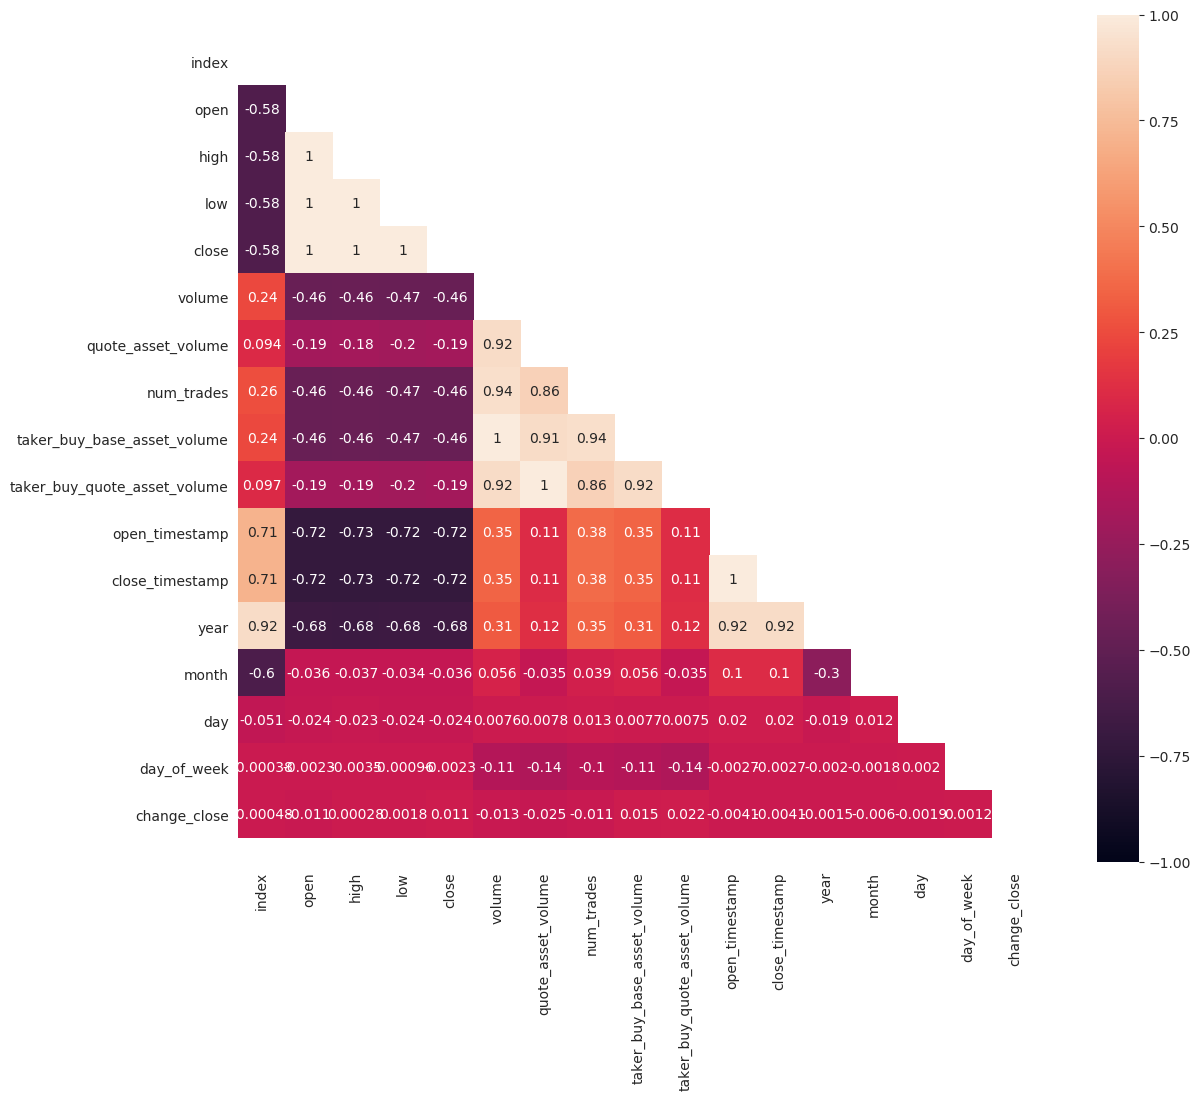

In [24]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sn.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 11))
    ax = sn.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin= -1.0, square=True, annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plt.show()

### Load Twitter data

In [50]:
df_tweet = pd.read_csv('BTC_tweets_cleaned.csv')

In [51]:
df_tweet.head()

,year,month,day,day_of_week,text,timestamp,sentiment
0,2023,6,1,3,555 unique drawn mutant primapes soon on netw...,2023-06-01T00:00:00Z,NEUTRAL
1,2023,6,1,3,bitcoin mining your path to digital fortune jo...,2023-06-01T00:00:00Z,NEUTRAL
2,2023,6,1,3,2 takip imize toplamda 1000 tl hediye ediyoru...,2023-06-01T00:00:00Z,NaN
3,2023,6,1,3,tether planeja minerar bitcoin no uruguaifique...,2023-06-01T00:00:00Z,NEUTRAL
4,2023,6,1,3,face screaming in fear hyped wl giveaway high...,2023-06-01T00:00:00Z,POSITIVE


In [52]:
pd.to_datetime(df_tweet.timestamp[0][:-1]).hour

0

In [53]:
df_tweet_senti = pd.get_dummies(df_tweet.sentiment, prefix='Sentiment')
# df_tweet_senti.shape
df_tweet = df_tweet.join(df_tweet_senti)
df_tweet['hour'] = df_tweet['timestamp'].apply(lambda x: pd.to_datetime(x[:-1]).hour)
df_tweet.shape


(1576, 12)

In [56]:
df_tweet_agg = df_tweet.groupby(['year','month','day','hour']).agg({'Sentiment_NEGATIVE':'sum','Sentiment_NEUTRAL':'sum',
                                                            'Sentiment_POSITIVE':'sum'}).reset_index()

df_tweet_agg.head()

,year,month,day,hour,Sentiment_NEGATIVE,Sentiment_NEUTRAL,Sentiment_POSITIVE
0,2023,6,1,0,0,7,1
1,2023,6,1,1,0,9,1
2,2023,6,1,2,0,7,1
3,2023,6,1,3,0,6,0
4,2023,6,1,4,0,10,0


In [57]:
df_tweet_agg.shape

(158, 7)

In [21]:
df_BTC.shape

(20962, 19)

In [62]:
df_BTC['hour'] = df_BTC['datetime'].apply(lambda x: x.hour)

In [65]:
df_joined = pd.merge(df_BTC, df_tweet_agg, how='inner', on=['year','month','day','hour'])

df_joined.shape

(144, 26)

In [66]:
df_joined.head(2)

,index,open_time,close_time,open,high,low,close,volume,quote_asset_volume,num_trades,...,datetime,year,month,day,day_of_week,change_close,hour,Sentiment_NEGATIVE,Sentiment_NEUTRAL,Sentiment_POSITIVE
0,17650,"06/01/2023, 00:00:00","06/01/2023, 00:59:59",27210.36,27350.00,27023.35,27065.77,2772.82443,7.541711e+07,57885,...,2023-06-01 00:00:00,2023,6,1,3,-144.58,0,0,7,1
1,17649,"06/01/2023, 01:00:00","06/01/2023, 01:59:59",27065.76,27165.47,27059.74,27078.56,1785.47203,4.842438e+07,30859,...,2023-06-01 01:00:00,2023,6,1,3,12.79,1,0,9,1


In [33]:
#filter for the days twitter data is avialable
# df_filter = df_joined[df_joined['datetime'] >= datetime.datetime(2023, 5, 20)]

In [34]:
df_filter.dtypes

open_time                               object
close_time                              object
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
quote_asset_volume                     float64
num_trades                               int64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
open_timestamp                         float64
close_timestamp                        float64
datetime                        datetime64[ns]
year                                     int64
month                                    int64
day                                      int64
day_of_week                              int64
change_open                            float64
VolperTrade                            float64
Sentiment_NEGATIVE                     float64
Sentiment_NEU

In [70]:
#Aggregating the dataframe by day to find out any correlation between the tweets and the prices 

df_daily = df_joined.groupby(['day','month','year','day_of_week','hour']).agg({'open_time':'min',
                                                                         'close_time':'max',
                                                                         'open':'first',
                                                                         'high':'max',
                                                                         'low':'min',
                                                                         'close':'last',
                                                                         'volume':'sum',
                                                                         'num_trades':'sum',
                                                                         'open_timestamp':'min',
                                                                         'close_timestamp':'max',
                                                                         'Sentiment_NEGATIVE':'mean',
                                                                         'Sentiment_NEUTRAL':'mean',
                                                                         'Sentiment_POSITIVE':'mean'}).reset_index()


df_daily['VolperTrade'] = df_daily['volume']/df_daily['num_trades']
df_daily['change_close'] = - (df_daily['close'].shift(1) - df_daily['close'])
df_daily.head()


,day,month,year,day_of_week,hour,open_time,close_time,open,high,low,close,volume,num_trades,open_timestamp,close_timestamp,Sentiment_NEGATIVE,Sentiment_NEUTRAL,Sentiment_POSITIVE,VolperTrade,change_close
0,1,6,2023,3,0,"06/01/2023, 00:00:00","06/01/2023, 00:59:59",27210.36,27350.00,27023.35,27065.77,2772.82443,57885,1685577600000,1685581199999,0.0,7.0,1.0,0.047902,NaN
1,1,6,2023,3,1,"06/01/2023, 01:00:00","06/01/2023, 01:59:59",27065.76,27165.47,27059.74,27078.56,1785.47203,30859,1685581200000,1685584799999,0.0,9.0,1.0,0.057859,12.79
2,1,6,2023,3,2,"06/01/2023, 02:00:00","06/01/2023, 02:59:59",27078.56,27114.16,26640.00,26719.26,3775.37874,66445,1685584800000,1685588399999,0.0,7.0,1.0,0.056820,-359.30
3,1,6,2023,3,3,"06/01/2023, 03:00:00","06/01/2023, 03:59:59",26719.26,26838.89,26605.05,26779.94,2879.51275,52426,1685588400000,1685591999999,0.0,6.0,0.0,0.054925,60.68
4,1,6,2023,3,4,"06/01/2023, 04:00:00","06/01/2023, 04:59:59",26779.93,26822.81,26746.00,26804.15,1223.77081,24654,1685592000000,1685595599999,0.0,10.0,0.0,0.049638,24.21


In [71]:
df_daily.columns

Index(['day', 'month', 'year', 'day_of_week', 'hour', 'open_time',
       'close_time', 'open', 'high', 'low', 'close', 'volume', 'num_trades',
       'open_timestamp', 'close_timestamp', 'Sentiment_NEGATIVE',
       'Sentiment_NEUTRAL', 'Sentiment_POSITIVE', 'VolperTrade',
       'change_close'],
      dtype='object')

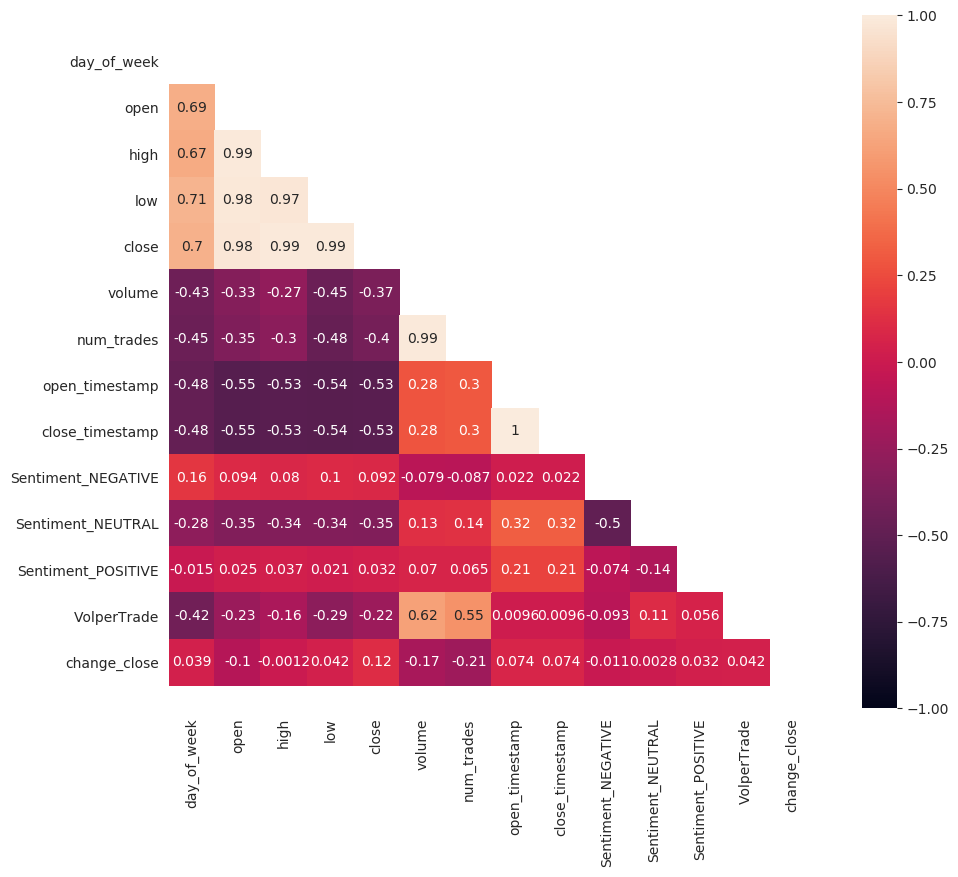

In [74]:
corr = df_daily[['day_of_week', 'open_time', 'close_time',
               'open', 'high', 'low', 'close', 'volume', 'num_trades',
               'open_timestamp', 'close_timestamp', 'Sentiment_NEGATIVE',
               'Sentiment_NEUTRAL', 'Sentiment_POSITIVE', 'VolperTrade', 'change_close']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sn.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 9))
    ax = sn.heatmap(corr, mask=mask, vmax=1.0, vmin= -1.0, square=True, annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plt.show()